In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_path = '../CBIR_15-Scene'
labels_file_path = os.path.join(data_path, 'Labels.txt')

with open(labels_file_path, 'r') as file:
    labels_content = file.readlines()
dataset = []

for line in labels_content:
    parts = line.strip().split()
    directory = parts[0]
    category = parts[1]
    start_idx = int(parts[2])
    end_idx = int(parts[3])
    
    dir_path = os.path.join(data_path, directory)
    if os.path.exists(dir_path):
        images = os.listdir(dir_path)
        images.sort()
        
        for idx in range(start_idx, end_idx + 1):
          img_name = f"{idx}" + '.jpg'
          if img_name in images:
            img_path = os.path.join(dir_path, img_name)
            dataset.append({'image_path': img_path, 'category': category})
            
df_dataset = pd.DataFrame(dataset)
df_dataset


,image_path,category
0,../CBIR_15-Scene/00/1.jpg,Bedroom
1,../CBIR_15-Scene/00/2.jpg,Bedroom
2,../CBIR_15-Scene/00/3.jpg,Bedroom
3,../CBIR_15-Scene/00/4.jpg,Bedroom
4,../CBIR_15-Scene/00/5.jpg,Bedroom
...,...,...
4480,../CBIR_15-Scene/14/4481.jpg,Store
4481,../CBIR_15-Scene/14/4482.jpg,Store
4482,../CBIR_15-Scene/14/4483.jpg,Store
4483,../CBIR_15-Scene/14/4484.jpg,Store


In [2]:
X = df_dataset['image_path']
y = df_dataset['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("X_train:", X_train.head())
print("y_train:", y_train.head())
print("X_test:", X_test.head())
print("y_test:", y_test.head())

X_train: 1715    ../CBIR_15-Scene/06/1716.jpg
1761    ../CBIR_15-Scene/06/1762.jpg
236      ../CBIR_15-Scene/01/237.jpg
494      ../CBIR_15-Scene/02/495.jpg
4323    ../CBIR_15-Scene/14/4324.jpg
Name: image_path, dtype: object
y_train: 1715      Forest
1761      Forest
236       Suburb
494     Industry
4323       Store
Name: category, dtype: object
X_test: 850      ../CBIR_15-Scene/03/851.jpg
1799    ../CBIR_15-Scene/06/1800.jpg
3834    ../CBIR_15-Scene/12/3835.jpg
1768    ../CBIR_15-Scene/06/1769.jpg
2595    ../CBIR_15-Scene/09/2596.jpg
Name: image_path, dtype: object
y_test: 850      Kitchen
1799      Forest
3834    Building
1768      Forest
2595    Mountain
Name: category, dtype: object


In [3]:
size = (64, 64)
images_train = np.empty((0, size[0], size[1], 3), dtype=np.uint8)
images_test = np.empty((0, size[0], size[1], 3), dtype=np.uint8)

for path in X_train:
    print(path)
    image = cv2.imread(path)
    if image is not None:
        print(image.shape)
        image = cv2.resize(image, size)
        image = np.expand_dims(image, axis=0)
        images_train = np.concatenate((images_train, image), axis=0)

for path in X_test:
    print(path)
    image = cv2.imread(path)
    if image is not None:
        image = cv2.resize(image, size)
        image = np.expand_dims(image, axis=0)
        images_test = np.concatenate((images_test, image), axis=0)


../CBIR_15-Scene/06/1716.jpg
(256, 256, 3)
../CBIR_15-Scene/06/1762.jpg
(256, 256, 3)
../CBIR_15-Scene/01/237.jpg
(220, 330, 3)
../CBIR_15-Scene/02/495.jpg
(220, 274, 3)
../CBIR_15-Scene/14/4324.jpg
(220, 330, 3)
../CBIR_15-Scene/13/3996.jpg
(220, 330, 3)
../CBIR_15-Scene/10/2915.jpg
(256, 256, 3)
../CBIR_15-Scene/10/3108.jpg
(256, 256, 3)
../CBIR_15-Scene/06/1859.jpg
(256, 256, 3)
../CBIR_15-Scene/02/516.jpg
(220, 325, 3)
../CBIR_15-Scene/00/86.jpg
(220, 293, 3)
../CBIR_15-Scene/08/2485.jpg
(256, 256, 3)
../CBIR_15-Scene/14/4423.jpg
(220, 332, 3)
../CBIR_15-Scene/11/3566.jpg
(256, 256, 3)
../CBIR_15-Scene/05/1579.jpg
(256, 256, 3)
../CBIR_15-Scene/01/312.jpg
(220, 330, 3)
../CBIR_15-Scene/14/4388.jpg
(304, 220, 3)
../CBIR_15-Scene/02/614.jpg
(220, 321, 3)
../CBIR_15-Scene/05/1433.jpg
(256, 256, 3)
../CBIR_15-Scene/10/2970.jpg
(256, 256, 3)
../CBIR_15-Scene/03/799.jpg
(293, 220, 3)
../CBIR_15-Scene/08/2471.jpg
(256, 256, 3)
../CBIR_15-Scene/06/1954.jpg
(256, 256, 3)
../CBIR_15-Scene/06

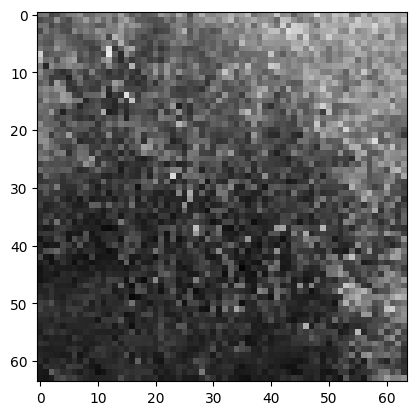

In [4]:

plt.imshow(images_train[0])
plt.show()

In [30]:
images_train.shape
n_samples_train, h_train, w_train, c_train = images_train.shape
n_samples_test, h_test, w_test, c_test = images_test.shape

images_train_flattened = images_train.reshape(n_samples_train, -1)
images_test_flattened = images_test.reshape(n_samples_test, -1)

In [36]:
from sklearn.decomposition import PCA

variance = 0.8
pca = PCA(n_components=variance)

train_pca = pca.fit_transform(images_train_flattened)
test_pca = pca.transform(images_test_flattened)

In [37]:
print("Dimensions before PCA: " + str(images_train.shape))
print("Dimensions after PCA: " + str(train_pca.shape))

print("Components after PCA 0.8: " + str(pca.n_components_))

Dimensions before PCA: (3588, 64, 64, 3)
Dimensions after PCA: (3588, 111)
Components after PCA 0.8: 111


In [38]:
from sklearn.cluster import KMeans

n_clusters = 15
k_means = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 35)
k_means.fit(train_pca)


KMeans(n_clusters=15, n_init=35)

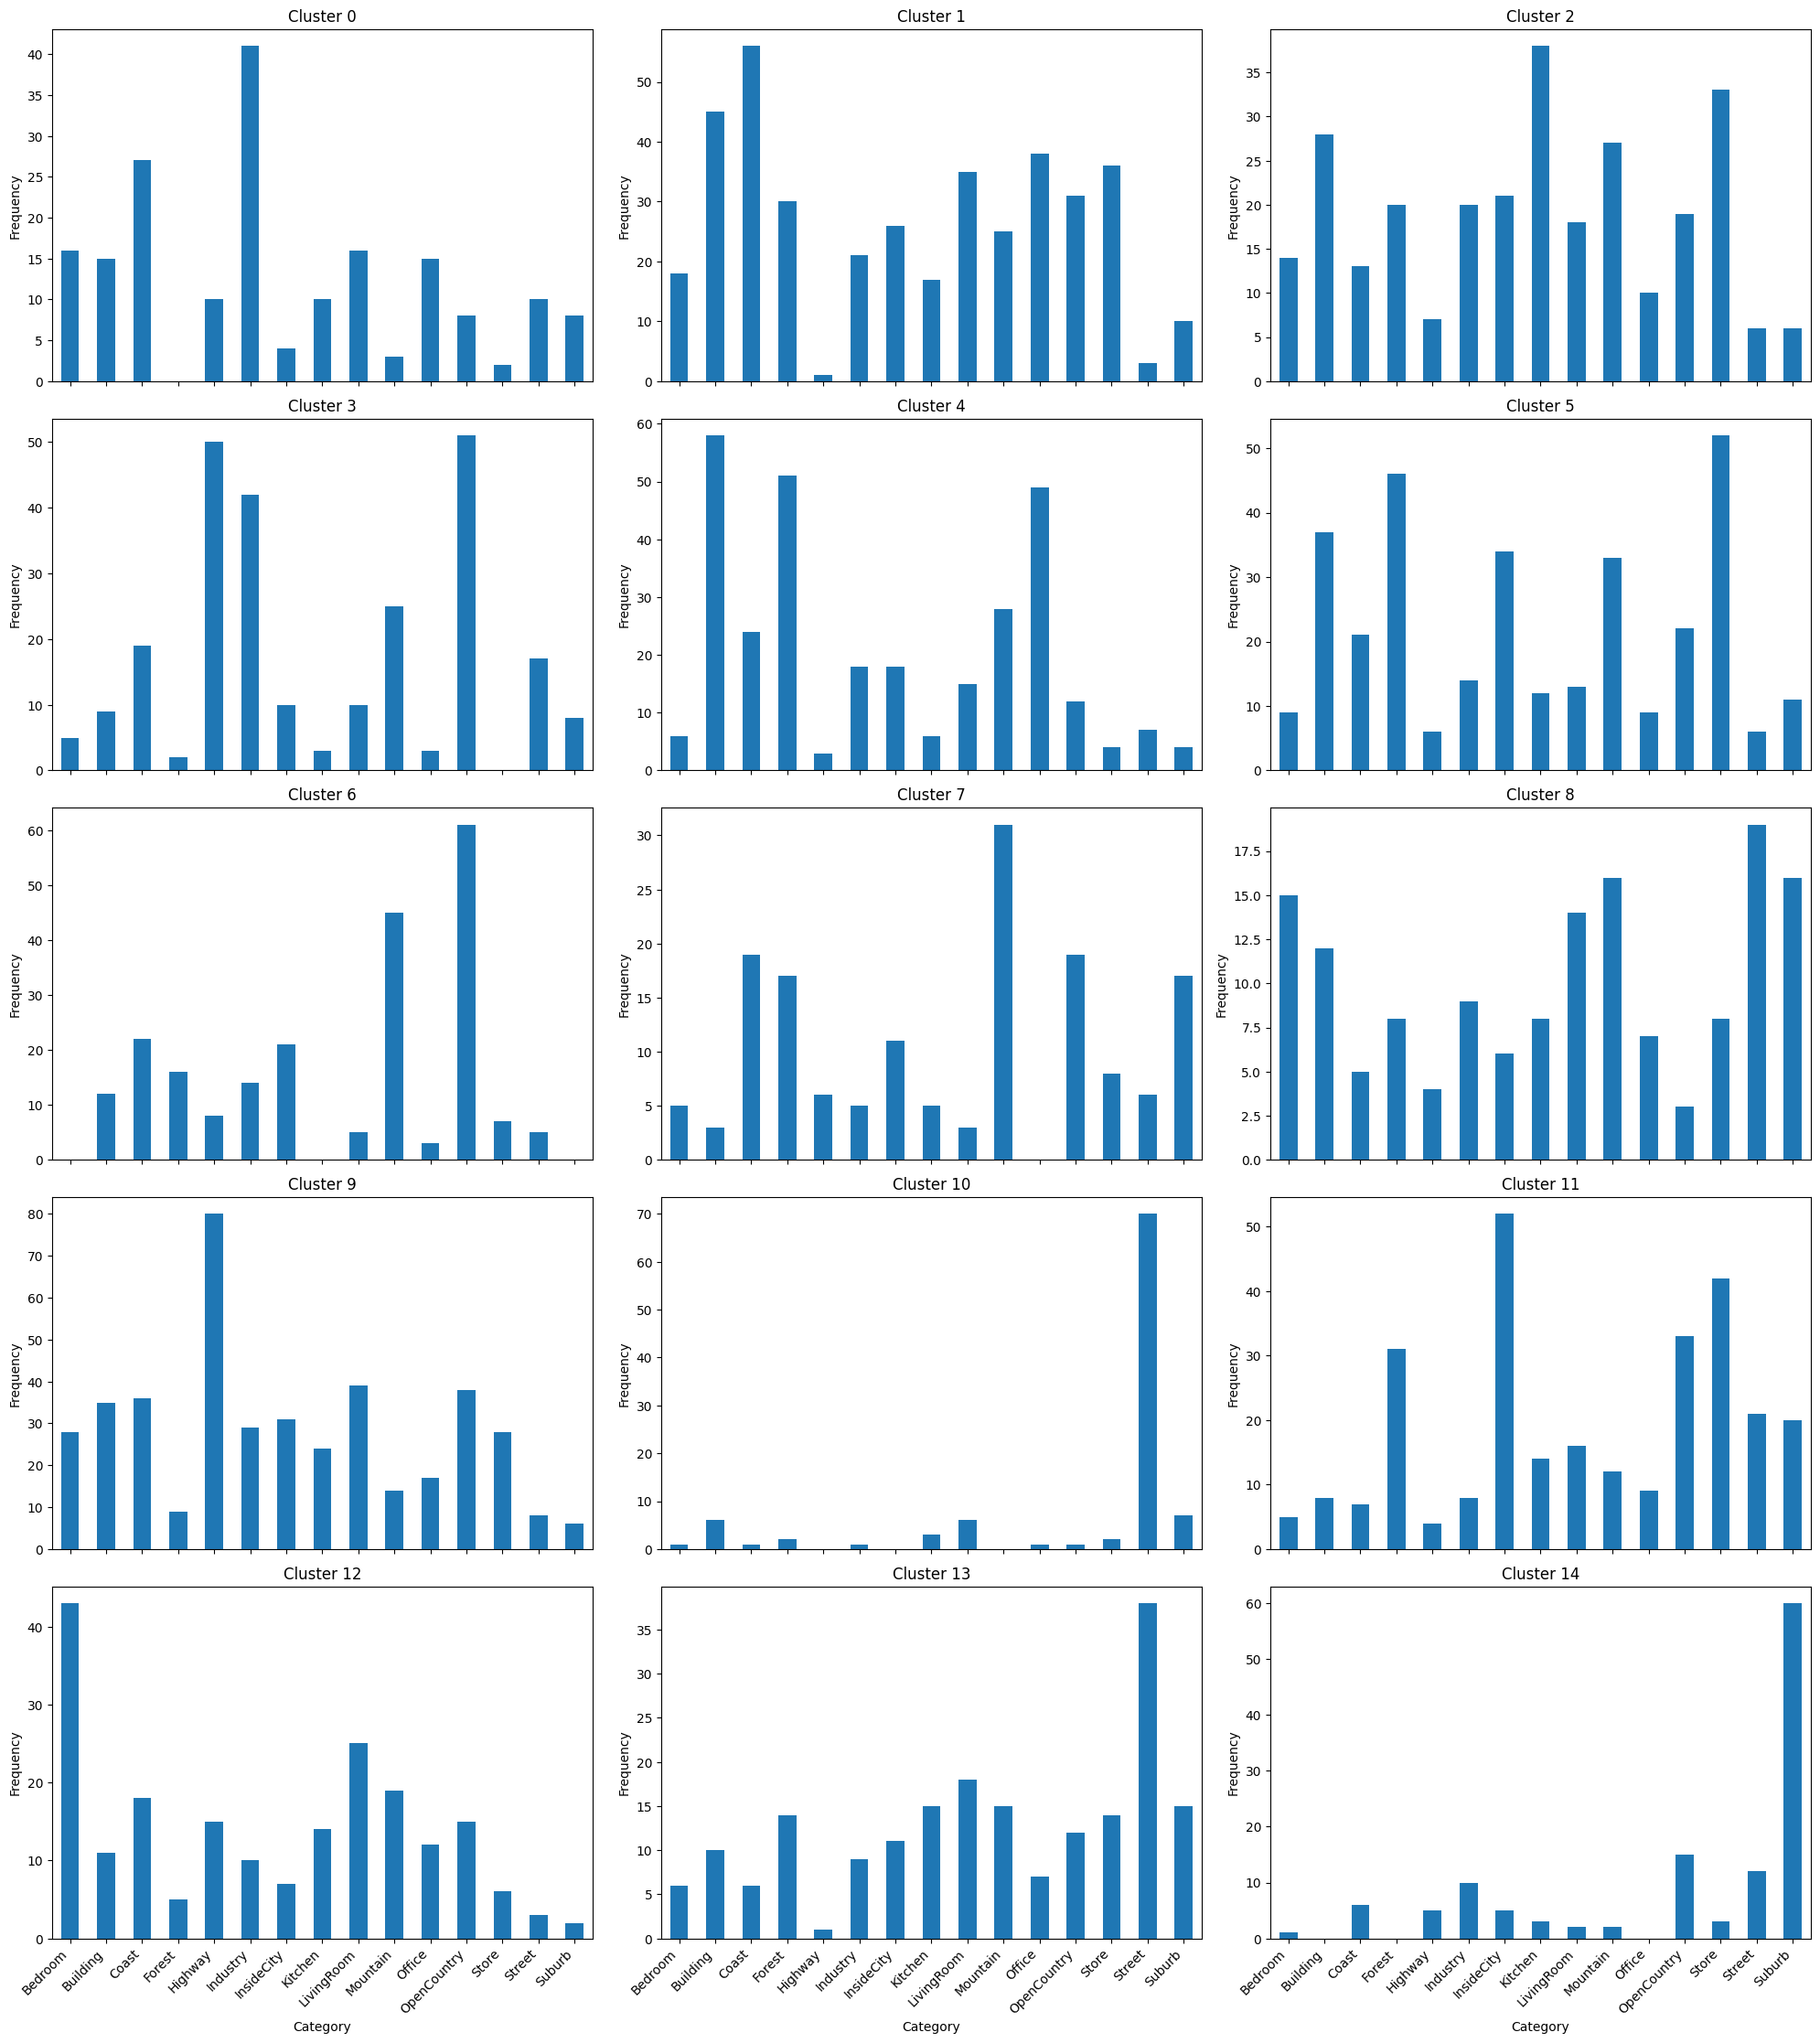

In [39]:
# Criar um DataFrame para contar as frequências
df_train = pd.DataFrame({'label': y_train.values, 'cluster': k_means.labels_})

# Contar as frequências das categorias em cada cluster
counts = df_train.groupby(['cluster', 'label']).size().unstack(fill_value=0)

# Plotar os gráficos de barras para cada cluster
fig, axes = plt.subplots((n_clusters + 2) // 3, 3, figsize=(20, 25), sharex=True)
axes = axes.flatten()

categories = counts.columns.tolist()

for i in range(n_clusters):
    ax = axes[i]
    counts.loc[i].plot(kind='bar', ax=ax)
    ax.set_title(f'Cluster {i}')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Category')
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=45, ha='right')

# Ajustar o espaçamento para garantir que os rótulos do eixo x sejam exibidos
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# Remover subplots extras
for j in range(n_clusters, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [42]:
from scipy.spatial.distance import cdist

distances = cdist(train_pca, k_means.cluster_centers_, 'euclidean')

# Determinar o cluster mais próximo e a distância
min_distances = np.min(distances, axis=1)

# Definir um limiar para OOD (exemplo: percentil 95 das distâncias mínimas)
threshold = np.percentile(min_distances, 95)

# Função para detectar OOD
def is_ood(point, cluster_centers, threshold):
    distance = np.min(cdist([point], cluster_centers, 'euclidean'))
    return distance > threshold

# Testar novos dados para OOD
new_data = test_pca
ood_results = [is_ood(point, k_means.cluster_centers_, threshold) for point in new_data]

# Imprimir os resultados de OOD
for idx, result in enumerate(ood_results):
    if result:
        print(f"Data point {idx} is out-of-distribution.")

Data point 19 is out-of-distribution.
Data point 80 is out-of-distribution.
Data point 92 is out-of-distribution.
Data point 121 is out-of-distribution.
Data point 187 is out-of-distribution.
Data point 217 is out-of-distribution.
Data point 223 is out-of-distribution.
Data point 237 is out-of-distribution.
Data point 279 is out-of-distribution.
Data point 283 is out-of-distribution.
Data point 300 is out-of-distribution.
Data point 339 is out-of-distribution.
Data point 367 is out-of-distribution.
Data point 368 is out-of-distribution.
Data point 371 is out-of-distribution.
Data point 384 is out-of-distribution.
Data point 542 is out-of-distribution.
Data point 606 is out-of-distribution.
Data point 607 is out-of-distribution.
Data point 619 is out-of-distribution.
Data point 632 is out-of-distribution.
Data point 644 is out-of-distribution.
Data point 697 is out-of-distribution.
Data point 700 is out-of-distribution.
Data point 712 is out-of-distribution.
Data point 768 is out-of-dis